# Step 0. 프로젝트 시작 전, 데이터 전처리

In [10]:
# 라이브러리 및 패키지 호출(os, pandas)
import os
import pandas as pd

# 저장해 둔 .csv 파일을 읽어서 DF 파일로 저장

# 변수에 파일 경로 저장
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
news_data_df = pd.read_table(csv_path, sep=',')
news_data_df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [11]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거
news_data_df['news'] = news_data_df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
news_data_df['news'].head()

0    파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1    동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2    황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3    귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4    서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
Name: news, dtype: object

In [12]:
# Null 값이 있는지 확인
print(news_data_df.isnull().sum())

news    0
code    0
dtype: int64


In [13]:
# 중복 샘플 제거

# 중복 제거 전 기사 갯수
print('뉴스 기사의 개수: ',len(news_data_df))

# 중복 제거
news_data_df.drop_duplicates(subset=['news'], inplace=True)

# 중복 제거 후 기사 갯수
print('뉴스 기사의 개수: ',len(news_data_df))

뉴스 기사의 개수:  5124
뉴스 기사의 개수:  3994


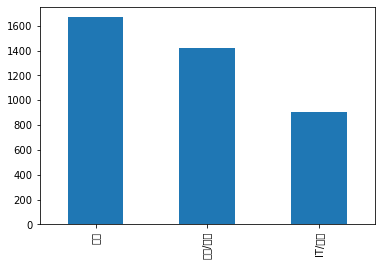

In [15]:
# Matplotlib 확인해서 카테고리 별 샘플 분포 확인
import matplotlib.pyplot as plt
%matplotlib inline

news_data_df['code'].value_counts().plot(kind = 'bar')

In [23]:
# 각 카테고리 별 뉴스기사 수 확인
print(news_data_df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423


# Step 1. 형태소 분석기 변경해 보기 1. Hannanum 

* 한국어 자연어 처리에서는 어떤 형태소 분류기를 사용하는지가 성능에 영향을 줌
* konlpy 패키지에는 Mecab 이외에 Hannanum, Kkma, Komoran, Okt 라는 형태소분석기가 존재
* 각 형태소 분석기 별 어떤것을 선택하는 것이 좋은지?
* 분석기 간 장단점은 무엇인지?
* 처리 속도와 성능에는 어떤 변화가 있는지? 확인해보기

In [28]:
# 토큰화

# 1. Hannanum 형태소 분석기 사용

# 분석기 불러오기
from konlpy.tag import Hannanum

# 토큰 분석기 변수에 저장
tokenizer = Hannanum()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    


In [31]:
text_data_1 = preprocessing(news_data_df['news'])
print(text_data_1[0])

파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기 이 자 파 아 주 시는 일 관내 취약계층 만가구 대 어 하 어 정부 긴급재난지원금 입금 완료했다파주시민 이 받 긴급재난지원금 일 ㄴ 이상 가구 기준 으로 만원 받 게 되 며 일 ㄴ 가구 만원 일 ㄴ 가구 만원 일 ㄴ 가구 만원이다정부 발표 하 ㄴ 긴급재난지원금 이 파주시민 지급 하 ㄴ 금액 과 다르 ㄴ 이유 국비지방비 부담 비율 때문이다파주시 이미 모든 시민 경기도파주시 재난기본소득인당 각 만원 지급 하고 어 시민 국비 지원금 만 지급 하 며 일 ㄴ 가구 기준 으로 총 지원 금액 파주시 재난기본소득 만원 경기 도 재난기본소득 만원 정부 긴급재난지원금 만원 총 만원 받 게 된다취약계층 이 아니 ㄴ 시민 오 월일 부터 소 이 지 하고 신용체크카드사 홈페이지 에서 긴급재난지원금 지원 신청 하 ㄹ 수 다 세대주 가족 지원금 일괄 신청 하 어야 한다한편 파 아 주 시는 일 김정기 부시장 단장 으로 하 긴급재난지원금 추진 태스크포스 를 구성해 긴급재난지원금 이 원활 하 게 지급 되 ㄹ 수 도록 지원 하 ㄴ다 저작권자 파이낸셜뉴스 전재재배포


In [32]:
# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 라이브러리 및 패키지 호출
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_1, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999


In [33]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [34]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [35]:
# 나이브 베이즈 분류기 사용 예시 1 - 사회
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [36]:
# 나이브 베이즈 분류기 사용 예시 2 - 생활/문화
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [37]:
# 나이브 베이즈 분류기 사용 예시 3 - IT/과학
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [38]:
# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       IT/과학       0.90      0.64      0.75       236
          사회       0.79      0.91      0.85       422
       생활/문화       0.79      0.79      0.79       341

    accuracy                           0.81       999
   macro avg       0.83      0.78      0.80       999
weighted avg       0.82      0.81      0.80       999



# Step 1. 형태소 분석기 변경해 보기 2. Kkma

In [48]:
# Step 1. 형태소 분석기 변경해 보기 2. Kkma

# 2. Kkma 형태소 분석기 사용

# 분석기 불러오기
from konlpy.tag import Kkma

# 토큰 분석기 변수에 저장
tokenizer_2 = Kkma()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer_2.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    

text_data_2 = preprocessing(news_data_df['news'])
print(text_data_2[0])

# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_2, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 강 근주 파주시 일 관내 취약 계층 만 가구 대하 어 정부 긴급 재난 지원금 입금 완료 하 었 다 파주 시민 이 받 긴급 재난 지원금 인 이상 가구 기준 으로 만원 받 게 되 며 이 ㄴ 가구 만원 인 가구 만원 인 가구 만원 이 다 정부 발표 하 ㄴ 긴급 재난 지원금 이 파주시 민 지급 하 ㄴ 금액 과 다르 ㄴ 이유 국비 지방비 부담 비율 때문 이 다 파주시 이미 모든 시민 경기도 파주시 재난 기본 소득 이 ㄴ 당 각 만원 지급 하 고 어 시민 국비 지원금 만 지급 하 며 이 ㄴ 가구 기준 으로 총 지원 금액 파주시 재난 기본 소득 만원 경기도 재난 기본 소득 만원 정부 긴급 재난 지원금 만원 총 만원 받 게 되 ㄴ다 취약 계층 이 아니 ㄴ 시민 오 월일 부터 소지 하 고 신용 체크 카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 하 ㄹ 수 다 세대주 가족 지원금 일괄 신청 하 어야 하 ㄴ다 한편 파주시 일 김 정기 부시장 단장 으로 하 긴급 재난 지원금 추진 태스크 포스 를 구성 하 어 긴급 재난 지원금 이 원활 하 게 지급 되 ㄹ 수 도록 지원 하 ㄴ다 저작권자 재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.90      0.75      0.82       236
          사회       0.80      0.91      0.85       422
       생활/문화       0.81      0.77      0.79       341

    accuracy                           0.82       999
   macro avg       0.84      0.81      0.82       999
w


# Step 1. 형태소 분석기 변경해 보기 3. Komoran

In [50]:
# Step 1. 형태소 분석기 변경해 보기 3. Komoran

# 3. Komoran 형태소 분석기 사용

# 분석기 불러오기
from konlpy.tag import Komoran

# 토큰 분석기 변수에 저장
tokenizer_3 = Komoran()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer_3.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    

text_data_3 = preprocessing(news_data_df['news'])
print(text_data_3[0])

# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_3, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 파이낸셜뉴스 강 근 주 파주시 일 관내 취약 계층 만 가구 대하 아 정부 긴급 재난 지원금 입금 완료 하 았 다 파주시 민이 받 긴급 재난 지원금 인 이상 가구 기준 으로 만원 받 게 되 며 인 가구 만원 인 가구 만원 인 가구 만원 이다 정부 발표 하 ㄴ 긴급 재난 지원금 이 파주시 민 지급 하 ㄴ 금액 과 다른 이유 국비 지방비 부담 비율 때문 이다 파주시 이미 모든 시민 경기도 파주시 재난 기본소득 인당 각 만원 지급 하 고 어 시민 국비 지원금 만 지급 하 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만원 경기도 재난 기본소득 만원 정부 긴급 재난 지원금 만원 총 만원 받 게 되 ㄴ 다 취약 계층 이 아니 ㄴ 시민 오 월 일 부터 소지 하 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 하 ㄹ 수 다 세대주 가족 지원금 일괄 신청 하 아야 한 다 한편 파주시 일 김정기 부시장 단장 으로 하 긴급 재난 지원금 추진 태스크포스를 구성 하 아 긴급 재난 지원금 이 원활 하 게 지급 되 ㄹ 수 도록 지원 하 ㄴ다 저작권 자 파이낸셜뉴스 재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.80      0.91      0.85       422
       생활/문화       0.81      0.77      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.81      0.82       999
wei

# Step 1. 형태소 분석기 변경해 보기 4. Okt

In [51]:
# Step 1. 형태소 분석기 변경해 보기 4. Okt

# 4. Okt 형태소 분석기 사용

# 분석기 불러오기
from konlpy.tag import Okt

# 토큰 분석기 변수에 저장
tokenizer_4 = Okt()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer_4.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    

text_data_4 = preprocessing(news_data_df['news'])
print(text_data_4[0])

# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_4, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 파이낸셜뉴스 강 근 주 파주시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지 원금 입금 완료 했다 파주시민 이 받는 긴급 재난 지원 금은 인 이상 가구 기준 으로 만원 받게 되며 인 가구 만원 인 가구 만원 인 가구 만원 이다 정부 발표 한 긴급 재난 지 원금 이 파주시민 지급 한 금액 과 다른 이유 국비 지 방비 부담 비율 때문 이다 파주시 이미 모든 시민 경기도 파주시 재난 기본소득 인 당 각 만원 지급 하고 있어 시민 국비 지 원금 만 지급 하며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만원 경기도 재난 기본소득 만원 정부 긴급 재난 지 원금 만원 총 만원 받게 된다 취약 계층 이 아닌 시민 오는 월일 부터 소지 하고 있는 신용 체크카드 사 홈페이지 에서 긴급 재난 지 원금 지원 신청 할 수 있다 세대주 가족 지 원금 일괄 신청 해야 한다 한편 파주시 일 김정기 부시장 단장 으로 하는 긴급 재난 지 원금 추진 태스크포스 를 구성 해 긴급 재난 지 원금 이 원활하게 지급 될 수 있도록 지원 한 다 저작권 자 파이낸셜뉴스 전 재재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.91      0.70      0.79       236
          사회       0.78      0.93      0.85       422
       생활/문화       0.83      0.76      0.79       341

    accuracy                           0.82       999
   macro avg       0.84      0.80      0.81       999
weighted avg

# Step 1. 형태소 분석기 변경해 보기 5. Mecab

In [47]:
# Step 1. 형태소 분석기 변경해 보기 5. Mecab

# 토큰화

# 5. Mecab 형태소 분석기 사용

# 분석기 불러오기
from konlpy.tag import Mecab

# 토큰 분석기 변수에 저장
tokenizer_5 = Mecab()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer_5.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    

text_data_5 = preprocessing(news_data_df['news'])
print(text_data_5[0])

# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_5, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 이 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 이 다 정부 발표 한 긴급 재난 지원금 이 파주 시민 지급 한 금액 과 다른 이유 국비 지방비 부담 비율 때문 이 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 하 고 어 시민 국비 지원금 만 지급 하 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 이 아닌 시민 오 월일 부터 소지 하 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 할 수 다 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 하 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 이 원활 하 게 지급 될 수 도록 지원 한다 권 자 재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.79      0.91      0.85       422
       생활/문화       0.81      0.76      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.80      0.81       999
weighted avg       0.82  

# Step 2. 불용어 추가

* 형태소 분석기는 Step 1. 과정에서 상대적으로 F-1 Score Accuracy가 좋게 나온 Kkma와 Komoran 각각 사용

In [52]:
# Step 2. 불용어 추가

# 2. Kkma 형태소 분석기 사용

# 분석기 불러오기
from konlpy.tag import Kkma

# 토큰 분석기 변수에 저장
tokenizer_2 = Kkma()

# 불용어 정의 추가 - '으로', '이', '하', '게', '를', '에서', '한', '만', '대해', '받', '인', '과', '하', '고', '이미', '한다', '해야' 추가
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스', '으로', '이', '하', '게', '를', '에서', '한', '만', '대해', '받', '인', '과', '하', '고', '이미', '한다', '해야']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer_2.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    

text_data_2 = preprocessing(news_data_df['news'])
print(text_data_2[0])

# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_2, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 강 근주 파주시 일 관내 취약 계층 가구 대하 어 정부 긴급 재난 지원금 입금 완료 었 다 파주 시민 긴급 재난 지원금 이상 가구 기준 만원 되 며 ㄴ 가구 만원 가구 만원 가구 만원 다 정부 발표 ㄴ 긴급 재난 지원금 파주시 민 지급 ㄴ 금액 다르 ㄴ 이유 국비 지방비 부담 비율 때문 다 파주시 모든 시민 경기도 파주시 재난 기본 소득 ㄴ 당 각 만원 지급 어 시민 국비 지원금 지급 며 ㄴ 가구 기준 총 지원 금액 파주시 재난 기본 소득 만원 경기도 재난 기본 소득 만원 정부 긴급 재난 지원금 만원 총 만원 되 ㄴ다 취약 계층 아니 ㄴ 시민 오 월일 부터 소지 신용 체크 카드 사 홈페이지 긴급 재난 지원금 지원 신청 ㄹ 수 다 세대주 가족 지원금 일괄 신청 어야 ㄴ다 한편 파주시 일 김 정기 부시장 단장 긴급 재난 지원금 추진 태스크 포스 구성 어 긴급 재난 지원금 원활 지급 되 ㄹ 수 도록 지원 ㄴ다 저작권자 재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.90      0.75      0.82       236
          사회       0.80      0.91      0.85       422
       생활/문화       0.81      0.77      0.79       341

    accuracy                           0.82       999
   macro avg       0.84      0.81      0.82       999
weighted avg       0.83      0.82      0.82       999



In [53]:

# Step 2. 불용어 추가

# 3. Komoran 형태소 분석기 사용

# 분석기 불러오기
from konlpy.tag import Komoran

# 토큰 분석기 변수에 저장
tokenizer_3 = Komoran()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer_3.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    

text_data_3 = preprocessing(news_data_df['news'])
print(text_data_3[0])

# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_3, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 파이낸셜뉴스 강 근 주 파주시 일 관내 취약 계층 만 가구 대하 아 정부 긴급 재난 지원금 입금 완료 하 았 다 파주시 민이 받 긴급 재난 지원금 인 이상 가구 기준 으로 만원 받 게 되 며 인 가구 만원 인 가구 만원 인 가구 만원 이다 정부 발표 하 ㄴ 긴급 재난 지원금 이 파주시 민 지급 하 ㄴ 금액 과 다른 이유 국비 지방비 부담 비율 때문 이다 파주시 이미 모든 시민 경기도 파주시 재난 기본소득 인당 각 만원 지급 하 고 어 시민 국비 지원금 만 지급 하 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만원 경기도 재난 기본소득 만원 정부 긴급 재난 지원금 만원 총 만원 받 게 되 ㄴ 다 취약 계층 이 아니 ㄴ 시민 오 월 일 부터 소지 하 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 하 ㄹ 수 다 세대주 가족 지원금 일괄 신청 하 아야 한 다 한편 파주시 일 김정기 부시장 단장 으로 하 긴급 재난 지원금 추진 태스크포스를 구성 하 아 긴급 재난 지원금 이 원활 하 게 지급 되 ㄹ 수 도록 지원 하 ㄴ다 저작권 자 파이낸셜뉴스 재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.80      0.91      0.85       422
       생활/문화       0.81      0.77      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.81      0.82       999
wei

# Step 3. 다른 날짜 데이터 추가

In [54]:
# 새로운 변수에 다른 파일 경로 저장
csv_path_2 = os.getenv("HOME") + "/aiffel/news_crawler/news_data2.csv"
news_data_df_2 = pd.read_table(csv_path_2, sep=',')
news_data_df_2.head()

,news,code
0,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,경제
1,▶제21대 총선 실시간 개표 현황 및 결과 보기\n\n총선에서 여당이 다시 한 번 ...,경제
2,[뉴욕=AP/뉴시스]지난 10일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다....,경제
3,"부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 1200원대, 경유는 1000원...",경제
4,담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다.이전...,경제


In [55]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거
news_data_df_2['news'] = news_data_df_2['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
news_data_df_2['news'].head()

0    기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...
1    제대 총선 실시간 개표 현황 및 결과 보기총선에서 여당이 다시 한 번 승리를 거두면...
2    뉴욕뉴시스지난 일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다 신종 코로나바이...
3    부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 원대 경유는 원대에 돌입했다일 ...
4    담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다이전까...
Name: news, dtype: object

In [56]:
# Null 값이 있는지 확인
print(news_data_df_2.isnull().sum())

news    0
code    0
dtype: int64


In [57]:
# 중복 샘플 제거

# 중복 제거 전 기사 갯수
print('뉴스 기사의 개수: ',len(news_data_df_2))

# 중복 제거
news_data_df_2.drop_duplicates(subset=['news'], inplace=True)

# 중복 제거 후 기사 갯수
print('뉴스 기사의 개수: ',len(news_data_df_2))

뉴스 기사의 개수:  3703
뉴스 기사의 개수:  2137


In [58]:
# 각 카테고리 별 뉴스기사 수 확인
print(news_data_df_2.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학    235
1     경제    902
2     사회    554
3  생활/문화    446


In [59]:
# Step3. 분석 결과 출력
# 형태소 분석기 : Komoran 사용
# Step 2에서 추가된 불용어 적용

# 분석기 불러오기
from konlpy.tag import Komoran

# 토큰 분석기 변수에 저장
tokenizer_3 = Komoran()

# 불용어 정의
stopwords = ['에','는','은','을','했','에게','있','#','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
        
    temp_data = []
    
    #- 토큰화
    temp_data = tokenizer_3.morphs(sentence)
    
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
    

text_data_3 = preprocessing(news_data_df['news'])
print(text_data_3[0])

# 사이킷 런 라이브러리를 이용하여 데이터 셋 분리

# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data_3, news_data_df['code'], random_state = 0)

# 데이터 출력
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

# 나이브 베이즈를 이용한 test data 모델 측정
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 파이낸셜뉴스 강 근 주 파주시 일 관내 취약 계층 만 가구 대하 아 정부 긴급 재난 지원금 입금 완료 하 았 다 파주시 민이 받 긴급 재난 지원금 인 이상 가구 기준 으로 만원 받 게 되 며 인 가구 만원 인 가구 만원 인 가구 만원 이다 정부 발표 하 ㄴ 긴급 재난 지원금 이 파주시 민 지급 하 ㄴ 금액 과 다른 이유 국비 지방비 부담 비율 때문 이다 파주시 이미 모든 시민 경기도 파주시 재난 기본소득 인당 각 만원 지급 하 고 어 시민 국비 지원금 만 지급 하 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만원 경기도 재난 기본소득 만원 정부 긴급 재난 지원금 만원 총 만원 받 게 되 ㄴ 다 취약 계층 이 아니 ㄴ 시민 오 월 일 부터 소지 하 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 하 ㄹ 수 다 세대주 가족 지원금 일괄 신청 하 아야 한 다 한편 파주시 일 김정기 부시장 단장 으로 하 긴급 재난 지원금 추진 태스크포스를 구성 하 아 긴급 재난 지원금 이 원활 하 게 지급 되 ㄹ 수 도록 지원 하 ㄴ다 저작권 자 파이낸셜뉴스 재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.80      0.91      0.85       422
       생활/문화       0.81      0.77      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.81      0.82       999
wei

# 프로젝트 평가

1. 한국어 전처리 과정이 적절하였는가?

1의 답변 :
형태소 분석 과정은 konlpy에서 지원하는 5개의 형태소 분석기의 결과를 비교하여 가장 성능이 좋은 분석기를 선택함으로써 어느 정도 합리적으로 선택하였다고 생각함. 이후에 각 형태소 분석기의 특징과 원리를 이해한다면, 형태소 분석기 선택에 있어 더 좋은 결정을 할 수 있다고 생각됨

불용어 제거 과정의 경우, 불용어 선택에 있어 제 주관적인 선택에 의존하였으므로, 불용어 선택과정은 최적화 되지 않았다고 생각함

2. 텍스트 데이터 수집이 분량과 다양성 측면에서 적절했는가?
일자와 분량에서 텍스트 데이터 다양성 향상을 위한 노력이 확인됨

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?
F-1 score 기준 82% 이상의 정확도가 확인됨